In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('../data/raw/autorenew.csv')
df.sample(5)

,dateCrawled,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
207322,2016-03-16 20:42:35,Opel_Corsa_1.2_16V,private,offer,2400,small car,2004,manually,74.0,corsa,80000,1,petrol,opel,no,2016-03-16,0,71334,2016-03-22 01:17:42
175795,2016-03-20 22:39:53,Audi_A3_1.4_TFSI_Sportback_Ambiente,private,offer,10500,combi,2009,manually,123.0,a3,125000,4,petrol,audi,no,2016-03-20,0,10315,2016-04-07 07:46:25
192,2016-03-31 16:57:18,Ford_Mustang_V8_390cui,private,offer,25000,coupe,1968,automatic,301.0,mustang,90000,11,petrol,ford,no,2016-03-31,0,74547,2016-04-06 10:45:49
161938,2016-03-13 14:51:47,Hyundai_Atos_1.1_Ole,private,offer,1800,small car,2005,manually,57.0,andere,90000,3,petrol,hyundai,no,2016-03-13,0,85399,2016-04-06 16:17:11
323455,2016-03-14 13:44:34,Audi_A4_1_6_Benziner,private,offer,1200,NaN,1996,manually,0.0,a4,150000,0,petrol,audi,NaN,2016-03-14,0,46047,2016-03-30 23:18:06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371528 non-null  object 
 1   name                 371528 non-null  object 
 2   seller               371528 non-null  object 
 3   offerType            371528 non-null  object 
 4   price                371528 non-null  int64  
 5   vehicleType          237765 non-null  object 
 6   yearOfRegistration   371528 non-null  int64  
 7   gearbox              351319 non-null  object 
 8   powerCV              371528 non-null  float64
 9   model                351044 non-null  object 
 10  kilometer            371528 non-null  int64  
 11  monthOfRegistration  371528 non-null  int64  
 12  fuelType             338142 non-null  object 
 13  brand                371528 non-null  object 
 14  notRepairedDamage    299468 non-null  object 
 15  dateCreated      

## parsear fechas al read a `datetime`

In [ ]:
df = pd.read_csv('../data/raw/autorenew.csv',parse_dates=['dateCrawled','dateCreated','lastSeen'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   vehicleType          237765 non-null  object        
 6   yearOfRegistration   371528 non-null  int64         
 7   gearbox              351319 non-null  object        
 8   powerCV              371528 non-null  float64       
 9   model                351044 non-null  object        
 10  kilometer            371528 non-null  int64         
 11  monthOfRegistration  371528 non-null  int64         
 12  fuelType             338142 non-null  object        
 13  brand         

### analisis de fechas (que años tratamos)


In [5]:
columnasfechas = ['dateCrawled','dateCreated','lastSeen']
for col in columnasfechas:
    print(f'Columna tratada: {col} ---> tiene estos valores unicos por año: {df[col].dt.year.unique()}')

Columna tratada: dateCrawled ---> tiene estos valores unicos por año: [2016]
Columna tratada: dateCreated ---> tiene estos valores unicos por año: [2016 2015 2014]
Columna tratada: lastSeen ---> tiene estos valores unicos por año: [2016]


## eliminamos las columnas de fechas porque no nos aportan nada

In [6]:
df = df.drop(columns=columnasfechas)

## duplicados

In [7]:
df.duplicated().sum()

np.int64(6624)

## elimimaos duplicados

In [8]:
df = df.drop_duplicates()

## valores nulos total

In [9]:
round(df.isnull().mean()*100,2).sort_values(ascending=False)    

vehicleType            36.03
notRepairedDamage      19.40
fuelType                9.07
model                   5.56
gearbox                 5.43
name                    0.00
seller                  0.00
offerType               0.00
price                   0.00
yearOfRegistration      0.00
powerCV                 0.00
kilometer               0.00
monthOfRegistration     0.00
brand                   0.00
nrOfPictures            0.00
postalCode              0.00
dtype: float64

## almacenar los nuelos en una variable para aplicar filtros

In [10]:
nulos = df.isnull().mean()*100
nulos[nulos > 0].sort_values(ascending=False).round(2)

vehicleType          36.03
notRepairedDamage    19.40
fuelType              9.07
model                 5.56
gearbox               5.43
dtype: float64

## variables numericas

In [11]:
columnas_numericas = df.select_dtypes(include='number').columns
columnas_numericas

Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer',
       'monthOfRegistration', 'nrOfPictures', 'postalCode'],
      dtype='object')

In [12]:
df.describe(include='number').T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,364904.0,17502.27,3620372.48,0.0,1150.0,2950.0,7150.0,2.147484e+09
yearOfRegistration,364904.0,2004.58,93.55,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,364904.0,113.93,190.97,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,364904.0,125685.07,40090.32,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,364904.0,5.73,3.71,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,364904.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,364904.0,50944.55,25775.64,1067.0,30655.0,49688.0,71642.0,9.999800e+04


## elimamos numero de imagenes

In [13]:
df = df.drop(columns='nrOfPictures')

In [14]:
df = df.drop(columns='postalCode')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364904 entries, 0 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 364904 non-null  object 
 1   seller               364904 non-null  object 
 2   offerType            364904 non-null  object 
 3   price                364904 non-null  int64  
 4   vehicleType          233442 non-null  object 
 5   yearOfRegistration   364904 non-null  int64  
 6   gearbox              345098 non-null  object 
 7   powerCV              364904 non-null  float64
 8   model                344610 non-null  object 
 9   kilometer            364904 non-null  int64  
 10  monthOfRegistration  364904 non-null  int64  
 11  fuelType             331820 non-null  object 
 12  brand                364904 non-null  object 
 13  notRepairedDamage    294128 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 41.8+ MB


## histogramas

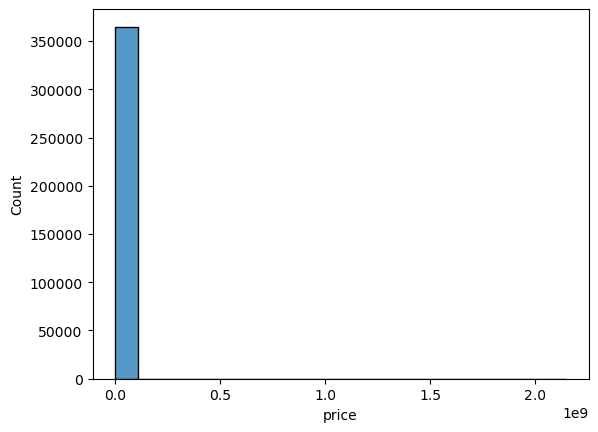

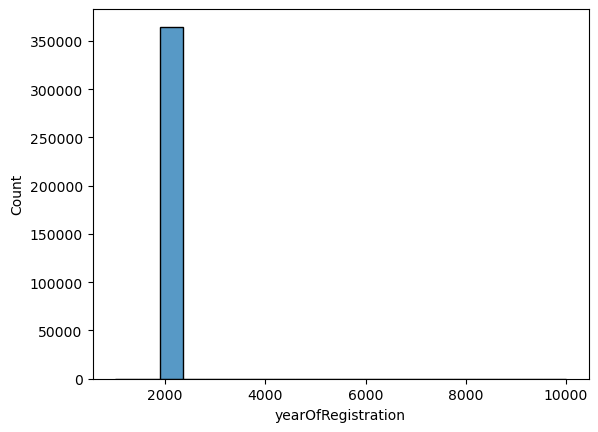

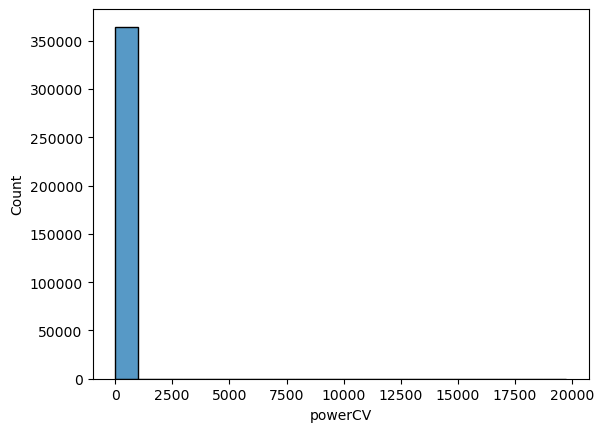

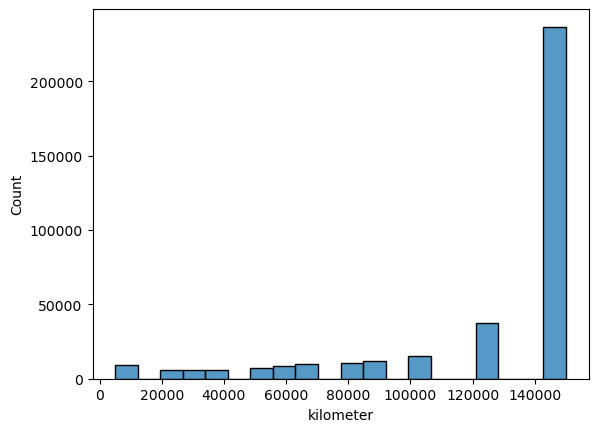

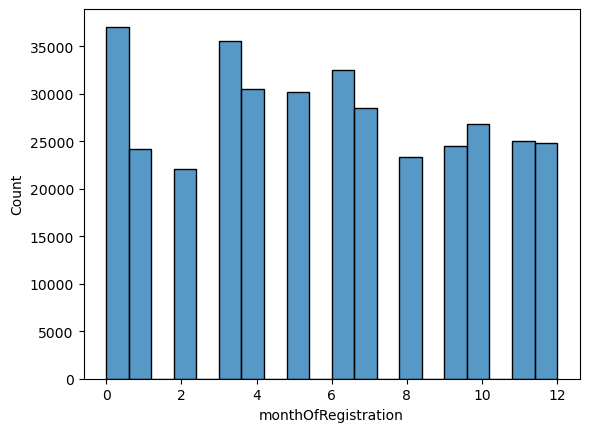

KeyError: 'nrOfPictures'

<Figure size 640x480 with 0 Axes>

In [16]:
columnas_numericas = columnas_numericas.drop(['postalCode'])
for col in columnas_numericas:
    plt.figure()
    sns.histplot(df[col],bins=20)
    plt.show()


## boxplot

In [ ]:
columnas_numericas 

Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer',
       'monthOfRegistration'],
      dtype='object')

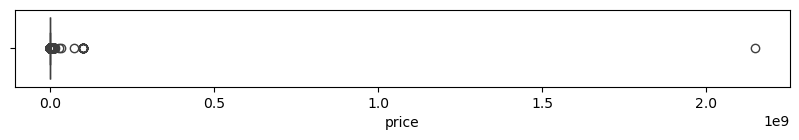

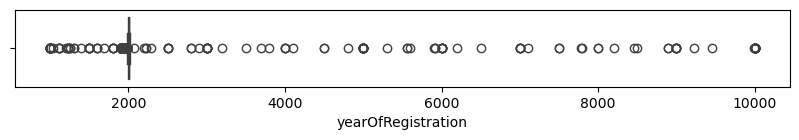

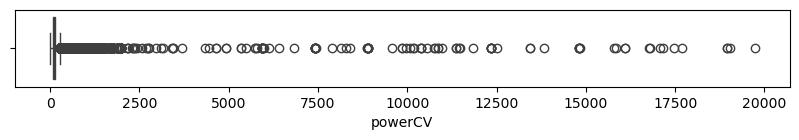

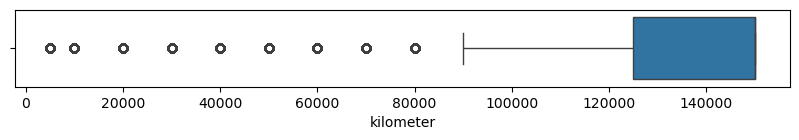

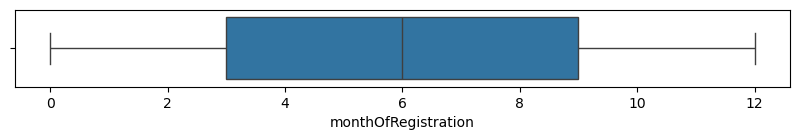

In [ ]:
for col in columnas_numericas:
    plt.figure(figsize=(10,1))
    sns.boxplot(x=df[col])
    plt.show()

## columnas categoricas

In [20]:
df.describe(include='object').T

,count,unique,top,freq
name,364904,233531,Ford_Fiesta,650
seller,364904,2,private,364901
offerType,364904,2,offer,364892
vehicleType,233442,7,small car,78621
gearbox,345098,2,manually,269737
model,344610,251,golf,29539
fuelType,331820,7,petrol,220299
brand,364904,40,volkswagen,78227
notRepairedDamage,294128,2,no,258291


In [21]:
columnas_categoricas = df.select_dtypes(include='object').columns
columnas_categoricas

Index(['name', 'seller', 'offerType', 'vehicleType', 'gearbox', 'model',
       'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

## valores uncios de columnas categoricas

In [22]:
for col in columnas_categoricas:
    print(f'columnas:{col} tiene los valores unicos:{df[col].nunique()}')
    display(df[col].value_counts(dropna=False).head(10))

columnas:name tiene los valores unicos:233531


name
Ford_Fiesta            650
BMW_318i               623
Opel_Corsa             614
Volkswagen_Golf_1.4    598
BMW_316i               515
BMW_320i               490
Volkswagen_Polo        471
Renault_Twingo         444
Volkswagen_Golf        427
Volkswagen_Golf_1.6    411
Name: count, dtype: int64

columnas:seller tiene los valores unicos:2


seller
private       364901
commercial         3
Name: count, dtype: int64

columnas:offerType tiene los valores unicos:2


offerType
offer      364892
request        12
Name: count, dtype: int64

columnas:vehicleType tiene los valores unicos:7


vehicleType
NaN            131462
small car       78621
combi           66264
bus             29640
convertible     22592
coupe           18757
suv             14249
other            3319
Name: count, dtype: int64

columnas:gearbox tiene los valores unicos:2


gearbox
manually     269737
automatic     75361
NaN           19806
Name: count, dtype: int64

columnas:model tiene los valores unicos:251


model
golf        29539
andere      26078
NaN         20294
3er         20286
polo        12930
corsa       12360
astra       10595
passat      10077
a4          10026
c_klasse     8605
Name: count, dtype: int64

columnas:fuelType tiene los valores unicos:7


fuelType
petrol     220299
diesel     105088
NaN         33084
lpg          5287
cng           561
hybrid        275
other         207
electro       103
Name: count, dtype: int64

columnas:brand tiene los valores unicos:40


brand
volkswagen       78227
bmw              39567
opel             39359
mercedes_benz    34681
audi             32144
ford             25092
renault          17651
peugeot          10805
fiat              9511
seat              6908
Name: count, dtype: int64

columnas:notRepairedDamage tiene los valores unicos:2


notRepairedDamage
no     258291
NaN     70776
yes     35837
Name: count, dtype: int64

## countplot

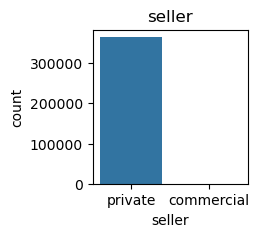

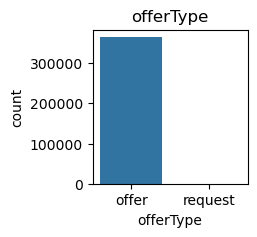

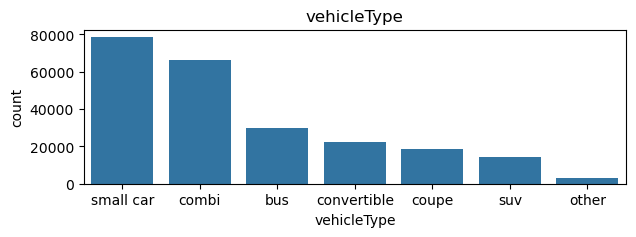

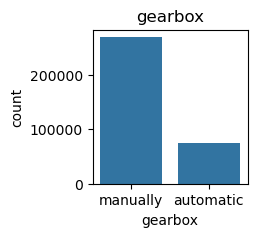

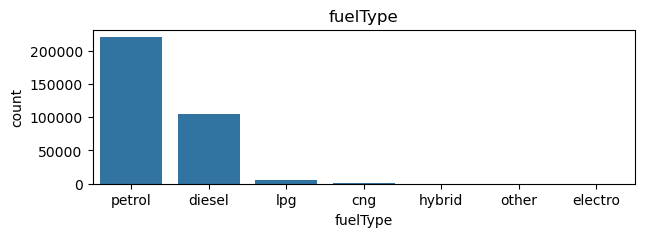

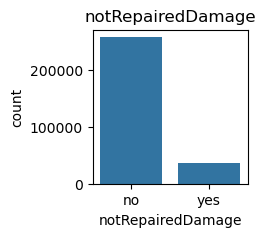

In [29]:
for col in columnas_categoricas:
    if df[col].nunique() < 20:       
        plt.figure(figsize=(df[col].nunique(),2))
        sns.countplot(x=df[col],order=df[col].value_counts().index)
        plt.title(col)
        plt.show()